In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Generate 500 data points with 3 classes
n_samples = 500
n_classes = 3

# Generate synthetic data for 3 classes
X = []
Y = []

In [ ]:
for class_num in range(n_classes):
    # Generate points for each class
    angle = (class_num * 2 * np.pi) / n_classes
    radius = np.random.randn(n_samples // n_classes, 1) * 0.5 + 3
    angles = np.random.randn(n_samples // n_classes, 1) * 0.3 + angle

    x1 = radius * np.cos(angles)
    x2 = radius * np.sin(angles)

    X.extend(np.hstack([x1, x2]))

    # One-hot encoding for 3 classes
    y = np.zeros((n_samples // n_classes, n_classes))
    y[:, class_num] = 1
    Y.extend(y)

X = np.array(X)
Y = np.array(Y)

# Shuffle the data
indices = np.random.permutation(len(X))
X = X[indices]
Y = Y[indices]

class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 10
        outLayerNeurons = 3  # Changed to 3 for 3 classes

        self.learning_rate = 0.2
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.sigmoid(hidden_input)
        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.hidden_output, der=True)

        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

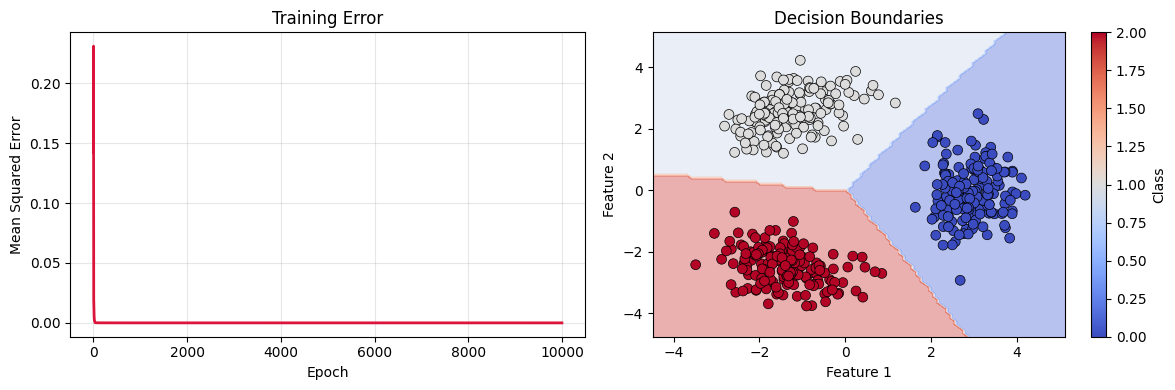

Sample predictions:
Input: [0, 3] -> Prediction: 0.0017976465959009722 -> Class: 1
Input: [3, 0] -> Prediction: 0.9992243202971427 -> Class: 0
Input: [0, -3] -> Prediction: 0.0006866238341690937 -> Class: 2

Accuracy: 100.00%


In [8]:
NN = NeuralNetwork()
err = []

for i in range(10000):
    NN.train(X, Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.figure(figsize=(12, 4))

# Plot training error with different color
plt.subplot(1, 2, 1)
plt.plot(err, color='crimson', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Error')
plt.grid(True, alpha=0.3)

# Plot decision boundaries with different colormap
plt.subplot(1, 2, 2)
h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = NN.feedForward(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=np.argmax(Y, axis=1), cmap='coolwarm',
            edgecolors='black', s=50, linewidth=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries')
plt.colorbar(label='Class')

plt.tight_layout()
plt.show()

# Test predictions
print("Sample predictions:")
test_points = [
    [0, 3],
    [3, 0],
    [0, -3]
]

for point in test_points:
    pred = NN.feedForward(point)
    predicted_class = np.argmax(pred)
    print(f"Input: {point} -> Prediction: {pred[0]} -> Class: {predicted_class}")

# Calculate accuracy
predictions = NN.feedForward(X)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y, axis=1)
accuracy = np.mean(predicted_classes == true_classes)
print(f"\nAccuracy: {accuracy * 100:.2f}%")